# Stock info Loading

Loading All required Dataset <br>
<li>
    Nifty 50 Historical index data from [ 2007-09-17 ] till [ Today ]
</li>
<li>
    News Data 1 & 2
</li>


In [ ]:
import pandas as pd
nifty_df = pd.read_csv(r'/content/drive/MyDrive/dataset/NIFTY_50.csv')
nifty_df.drop(columns=['Adj Close'], inplace=True)
nifty_df.head(5)

,Date,Open,High,Low,Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0


In [ ]:
nifty_df.Date

0       2007-09-17
1       2007-09-18
2       2007-09-19
3       2007-09-20
4       2007-09-21
           ...    
3972    2023-10-17
3973    2023-10-18
3974    2023-10-19
3975    2023-10-20
3976    2023-10-23
Name: Date, Length: 3977, dtype: object

In [ ]:
nifty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3977 non-null   object 
 1   Open    3947 non-null   float64
 2   High    3947 non-null   float64
 3   Low     3947 non-null   float64
 4   Close   3947 non-null   float64
 5   Volume  3947 non-null   float64
dtypes: float64(5), object(1)
memory usage: 186.5+ KB


#Loading data and merging data to single source and saving

In [ ]:
# /content/drive/MyDrive/dataset/news_dataset1.csv
news_df1 = pd.read_csv(r'/content/drive/MyDrive/dataset/news_dataset1.csv')

# convert the date column to datetime format
news_df1['Date'] = pd.to_datetime(news_df1['Date'], utc=True)
# change the datetime format
news_df1['date_formatted'] = news_df1['Date'].dt.strftime('%Y-%m-%d')

news_df1.drop(columns=['slno', 'Description', 'Date'], inplace=True)
news_df1.rename(columns = {'date_formatted':'Date'}, inplace = True)

news_df1 = news_df1.loc[news_df1['Date'] > '2007-09-16']
news_df1

,Title,Date
0,"ATMs to become virtual bank branches, accept d...",2020-05-26
1,IDFC First Bank seniors to forgo 65% of bonus ...,2020-05-26
2,"Huge scam in YES Bank for many years, says Enf...",2020-05-25
3,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",2020-05-24
4,DCB Bank's profit before tax declines 37.6% to...,2020-05-23
...,...,...
37322,SC to decide on banks' prepayment fee,2007-09-17
37323,Clients line up for funds at Northern Rock,2007-09-17
37324,Tax outgo likely to drain liquidity; Re may dip,2007-09-17
37325,ICICI Lombard bid for IOC cover raises a stink,2007-09-17


In [ ]:
news_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Date    50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# /content/drive/MyDrive/dataset/news_dataset2.csv
news_df2 = pd.read_csv(r'/content/drive/MyDrive/dataset/news_dataset2.csv')
news_df2.dropna(how='all', axis='columns', inplace=True)

# convert the date column to datetime format
news_df2['Date'] = pd.to_datetime(news_df2['Date'], utc=True)
news_df2['date_formatted'] = news_df2['Date'].dt.strftime('%Y-%m-%d')

news_df2.drop(columns=['confidence', 'URL', 'sentiment', 'Date'], inplace=True)
news_df2.rename(columns = {'date_formatted':'Date'}, inplace = True)

news_df2 = news_df2.loc[news_df2['Date'] > '2007-09-16']
news_df2

,Title,Date
0,Eliminating shadow economy to have positive im...,2017-05-01
1,Two Chinese companies hit roadblock with India...,2017-05-01
2,SoftBank India Vision gets new $100,2017-05-01
3,Nissan halts joint development of luxury cars ...,2017-05-01
4,Despite challenges Rajasthan continues to prog...,2017-05-01
...,...,...
200495,"Realme 8 5G launch date announced , specificat...",2021-12-04
200496,"Bitcoin resurges beyond $60 , 000 over reports...",2021-11-04
200497,FPIs withdraw Rs 929 cr from Indian markets so...,2021-11-04
200498,"Google confirms Pixel 5a 5G is not cancelled ,...",2021-11-04


In [ ]:
news_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200500 entries, 0 to 200499
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Title   200500 non-null  object
 1   Date    200500 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
# /content/drive/MyDrive/dataset/w_news_dataset.csv
news_df3 = pd.read_csv(r'/content/drive/MyDrive/dataset/w_news_dataset.csv')

# some cleaning and removing unnessery coloumns
news_df3.dropna(how='all', axis='columns', inplace=True)

news_df3['published_at'] = pd.to_datetime(news_df3['published_at'], utc=True)
news_df3['Date'] = news_df3['published_at'].dt.strftime('%Y-%m-%d')

news_df3.drop(columns=['index', 'url', 'author', 'publisher', 'keywords',
                       'header_image', 'short_description', 'raw_description',
                       'description', 'scraped_at', 'published_at'], inplace=True)

news_df3.rename(columns = {'title':'Title'}, inplace = True)

news_df3 = news_df3.loc[news_df3['Date'] > '2007-09-16']
news_df3

,Title,Date
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29
1,My take on the early Brexit winners and losers,2016-06-24
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22
4,Trump: 'Mission accomplished' on 'perfectly ex...,2018-04-14
...,...,...
620,Cash-Hungry States Are Putting Buildings on th...,2010-05-05
621,Since 2009 every time stocks have 3-week losin...,2019-05-29
622,Noble Energy Announces Conference Call To Disc...,2012-10-05
623,Here are some ways to play the 'stay-at-home' ...,2020-05-02


In [ ]:
news_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   625 non-null    object
 1   Date    625 non-null    object
dtypes: object(2)
memory usage: 9.9+ KB


In [ ]:
# merging all data
frame = [news_df1, news_df2, news_df3]
frame = pd.concat(frame)

In [ ]:
frame.to_csv(r'/content/drive/MyDrive/dataset/news_dataset.csv')

In [ ]:
# merging all data
news_df2.loc[news_df2['Date'] == '2007-09-17']['Title']

Series([], Name: Title, dtype: object)

#Gather news Data from news API

In [ ]:
!pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='426656d9594a436aae82a6768f2d52f2')

# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          category='business',
                                          language='en')

# /v2/everything
all_articles = newsapi.get_everything(q='nifty',
                                      from_param='2017-12-01',
                                      to='2017-12-12',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

# /v2/top-headlines/sources
sources = newsapi.get_sources()

NewsAPIException: ignored

In [ ]:
import datetime as dtime

def next_business_day(given_date:str):
    ymd = dtime.datetime.strptime(given_date, '%Y-%m-%d')
    date = dtime.datetime(ymd.year, ymd.month, ymd.day)
    skip_day = 1
    if date.weekday() == 4:
        skip_day = 3
    elif date.weekday() == 5:
        skip_day = 2
    date += dtime.timedelta(days=skip_day)
    date = date.strftime('%Y-%m-%d')
    return date

next_business_day('2007-09-22')

'2007-09-24'

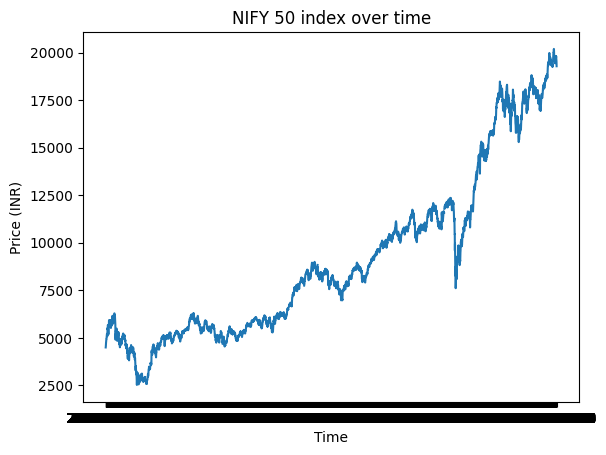

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nifty_df.Date, nifty_df.Close)
plt.xlabel("Time")
plt.ylabel("Price (INR)")
plt.title("NIFY 50 index over time")
plt.savefig("initial_plot.png", dpi=250)
plt.show();

In [ ]:
X, y = nifty_df.drop(columns=['Close']), nifty_df.Close.values
X.shape, y.shape

((3977, 5), (3977,))

#Loading news Data

In [ ]:
news_df = pd.read_csv(r'/content/drive/MyDrive/dataset/news_dataset.csv')

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238427 entries, 0 to 238426
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  238427 non-null  int64 
 1   Title       238427 non-null  object
 2   Date        238427 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


No null value in news data set

In [ ]:
print('Max Date: ', news_df.Date.max())
print('Min Date: ', news_df.Date.min())

Max Date:  2021-12-04
Min Date:  2007-09-17


#Preparing dataset

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00


In [ ]:
#@title Adding sentiment data to index day wise
import transformers
from transformers import BertModel, BertTokenizer
import torch

MAX_LEN = 512
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
class_names = ['NEGETIVE', 'POSITIVE']
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

from torch import nn
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(output[1])
    return self.out(output)

model = SentimentClassifier(2)
MODEL_PATH = '/content/drive/MyDrive/trained_model/bert_base_news_sentiment_v1.pth'
model.load_state_dict(torch.load(MODEL_PATH))
model = model.to(device)

def get_sentiment(text):
    '''
    Predicts sentiment of a text

    params: text:str Input text

    class: class_names = ['NEGETIVE', 'POSITIVE']

    return: predicted sentiment
    '''
    encoding = tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=MAX_LEN,
      return_token_type_ids=False,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        output = model(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)
    # print(f'Review text: {text}', f'Sentiment  : {class_names[prediction]}')
    return class_names[prediction]


cuda:0


In [ ]:
#@title Gathring news for a day
def training_news_data(date:str):
    # news_df1.loc[news_df1['Date'] == '2007-09-17']

    news = news_df.loc[news_df['Date'] == date]['Title']

    return news

training_news_data('2020-05-25')

2         Huge scam in YES Bank for many years, says Enf...
199338    Lufthansa : Lufthansa , Germany agree on $9 . ...
199339    labour shortage : FMCG firms to accelerate aut...
199340    Australian shares : Australia shares end 2 % f...
199341    Assam government expresses its stand on return...
                                ...                        
199844    Covid - 19 : Will stimulus package work - Hits...
199845    Sustaining Atmanirbharta : The right policy mi...
199846    Dr Reddy Rating : Neutral A strong performance...
199847    Would Modi government move towards direct cash...
199848    The big growth leap : Covid gives India the op...
Name: Title, Length: 98, dtype: object

In [ ]:
nifty_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
#@title Adding day wise news sentiment feature to NIFTY INDEX HISTORY
MAX_NO_OF_NEWS = 120
good_news = []
bad_news = []
# news_li = if_null_add_dummy([])
for date in nifty_df.Date:
    news = training_news_data(date)
    if len(news) == 0:
        good_news.append(0)
        bad_news.append(0)
    else:
        good_counter = 0
        bad_counter = 0
        for title in news:
            if get_sentiment(title) == 'NEGETIVE':
                bad_counter += 1
            else:
                good_counter += 1
        good_news.append(good_counter)
        bad_news.append(bad_counter)

nifty_df.insert(len(nifty_df.columns), 'GOOD_NEWS', good_news)
nifty_df.insert(len(nifty_df.columns), 'BAD_NEWS', bad_news)

In [ ]:
nifty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3977 non-null   object 
 1   Open       3947 non-null   float64
 2   High       3947 non-null   float64
 3   Low        3947 non-null   float64
 4   Close      3947 non-null   float64
 5   Volume     3947 non-null   float64
 6   GOOD_NEWS  3977 non-null   int64  
 7   BAD_NEWS   3977 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 248.7+ KB


In [ ]:
nifty_df.to_csv(r'/content/drive/MyDrive/dataset/nifty50_sentiment_dataset.csv')

In [ ]:
class NIFTY50Dataset(Dataset):
    def __init__(self, news, sentiment, tokenizer, max_len):
        self.news = news
        self.sentiment = sentiment
        self.tokenizer = tokenizer
        self.max_len = 512


#Business News Headline(national and international) sentiment will be attached to Historical feature per day

We now have the task of standardising our features. We’ll use standardisation for our training features X by removing the mean and scaling to unit variance. Standardisation helps the deep learning model to learn by ensuring that parameters can exist in the same multi-dimensional space; it wouldn’t make much sense to have the weights have to change their size simply because all the variables have different scales. For our target y, we will scale and translate each feature individually to between 0 and 1. This transformation is often used as an alternative to zero mean, unit variance scaling.

#Loading index data with sentiment

In [1]:
#@title Device selection
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using: ',device)

Using:  cuda:0


In [2]:
#@title Loading dataset file
import pandas as pd
nifty_df = pd.read_csv(r'/content/drive/MyDrive/dataset/nifty50_sentiment_dataset.csv', index_col='Date')
nifty_df.drop(nifty_df.columns[0], axis=1, inplace=True)

In [3]:
#@title Removing Nan fields
nifty_df = nifty_df[~nifty_df['Open'].isnull()]
X, y = nifty_df.drop(columns=['Close']), nifty_df.Close.values
X.shape, y.shape

((3947, 6), (3947,))

In [4]:
#@title Checking data fields
nifty_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 2007-09-17 to 2023-10-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3947 non-null   float64
 1   High       3947 non-null   float64
 2   Low        3947 non-null   float64
 3   Close      3947 non-null   float64
 4   Volume     3947 non-null   float64
 5   GOOD_NEWS  3947 non-null   int64  
 6   BAD_NEWS   3947 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 246.7+ KB


In [5]:
#@title Training features
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 2007-09-17 to 2023-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3947 non-null   float64
 1   High       3947 non-null   float64
 2   Low        3947 non-null   float64
 3   Volume     3947 non-null   float64
 4   GOOD_NEWS  3947 non-null   int64  
 5   BAD_NEWS   3947 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 215.9+ KB


In [6]:
#@title Feature transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

We want to feed in 90 samples, up to the current day, and predict the next 5 time step values. To do this, we need a special function to ensure that the corresponding indices of X and y represent this structure. Examine this function carefully, but essentially it just boils down to getting 90 samples from X, then looking at the 5 next indices in y, and patching these together. Note that because of this we'll throw out the first 5 values of y.

In [7]:
import numpy as np

# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 90, 5)
print(X_ss.shape, y_mm.shape)

(3854, 90, 6) (3854, 5)


In [8]:
assert y_mm[0].all() == y_trans[89:94].squeeze(1).all()
y_mm[0]

array([0.14202111, 0.1618251 , 0.15564166, 0.15602086, 0.14961386])

In [9]:
y_trans[89:94].squeeze(1)

array([0.14202111, 0.1618251 , 0.15564166, 0.15602086, 0.14961386])

we wanted to predict the data for 5 day ahead into the future. Thus, we’ll use a training data size of 99.982%, with 0.018% left for the remaining data that we’re going to predict. This gives us a training set size of 3902 days, or about 10 year and 6 months. We will predict 75 days into the future, which is about 2 month and 2 week.

In [10]:
#@title Splitting Data for training and testing
total_samples = len(X)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_ss[:train_test_cutoff]
X_test = X_ss[train_test_cutoff:]

y_train = y_mm[:train_test_cutoff]
y_test = y_mm[train_test_cutoff:]

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)

y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape)

Training Shape: torch.Size([3552, 90, 6]) torch.Size([3552, 5])
Testing Shape: torch.Size([302, 90, 6]) torch.Size([302, 5])


In [11]:
#@title torch Dataset
from torch.utils.data import Dataset, DataLoader

class NIFTY50Dataset(Dataset):

  def __init__(self, X, Y):
    self.x = X
    self.y = Y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    x = self.x[idx]
    y = self.y[idx]

    return x, y

In [12]:
#@title Dataloader helper
def create_data_loader(x, y, batch_size):
  ds = NIFTY50Dataset(X=x, Y=y)

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=2,
  )

In [13]:
#@title Creating Dataloader
BATCH_SIZE = 16
train_dataloader = create_data_loader(X_train, y_train, BATCH_SIZE)
test_dataloader = create_data_loader(X_test, y_test, BATCH_SIZE)

# Prediction Model Development

Bi-directional LSTM with self attention

In [14]:

from torch import nn
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()

        self.hidden_size = hidden_size
        # [16, 90, 1024]
        self.vw = nn.Linear(self.hidden_size, self.hidden_size, dtype=torch.float64)
        self.kw = nn.Linear(self.hidden_size, self.hidden_size, dtype=torch.float64)
        self.qw = nn.Linear(self.hidden_size, self.hidden_size, dtype=torch.float64)

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):

        # apply attention layer
        xvw = self.vw(x)
        xkw = self.kw(x)
        xqw = self.qw(x)

        xkqw = torch.mul(xkw, xqw)
        xkqw = self.softmax(torch.div(xkqw, torch.sqrt(torch.tensor(100))))

        # apply attention weights
        context = torch.mul(xvw, xkqw)

        return context

In [15]:
import torch
hidden_size = 512
test_out = torch.rand(16, 90, 1024, dtype=torch.float64)
atten = Attention(hidden_size*2)
context = atten(test_out)
context.shape

torch.Size([16, 90, 1024])

In [16]:

#@title Model defination

# https://towardsdatascience.com/attention-seq2seq-with-pytorch-learning-to-invert-a-sequence-34faf4133e53

class BiLSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        self.num_layers = num_layers # num of layers
        self.seq_len = seq_len

        self.flat = nn.Flatten(start_dim=1) # preserve batch

        self.atten1 = Attention(self.hidden_size*2)
        self.atten2 = Attention(self.hidden_size*2)
        self.atten3 = Attention(self.hidden_size*2)
        self.atten4 = Attention(self.hidden_size*2)
        # LSTM model
        self.lstm1 = nn.LSTM(input_size=self.input_size,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            batch_first=True,
                            dropout=0.2, bidirectional=True,
                            dtype=torch.float64,
                            ) # lstm

        self.lstm2 = nn.LSTM(input_size=self.hidden_size*2,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            batch_first=True,
                            dropout=0.2, bidirectional=True,
                            dtype=torch.float64,
                            ) # lstm

        self.lstm3 = nn.LSTM(input_size=self.hidden_size*2,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            batch_first=True,
                            dropout=0.2, bidirectional=True,
                            dtype=torch.float64,
                            ) # lstm

        self.lstm4 = nn.LSTM(input_size=self.hidden_size*2,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            batch_first=True,
                            dropout=0.2, bidirectional=True,
                            dtype=torch.float64,
                            ) # lstm

        self.fc1 = nn.Sequential(
            nn.ReLU(),
            nn.Linear(self.hidden_size*seq_len*2, 1024, dtype=torch.float64), # linear layer 1
            nn.LayerNorm(1024, dtype=torch.float64),
            nn.ReLU(),

            nn.Linear(1024, 512, dtype=torch.float64), # linear layer 2
            nn.LayerNorm(512, dtype=torch.float64),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.ReLU(),
            nn.Linear(512, 128, dtype=torch.float64), # linear layer 1
            nn.LayerNorm(128, dtype=torch.float64),
            nn.ReLU(),

            nn.Linear(128, num_classes, dtype=torch.float64), # linear layer 2
            nn.LayerNorm(num_classes, dtype=torch.float64),
            nn.ReLU()
        )

    def forward(self, x):
       # propagate input through LSTM
        x, (hn, cn) = self.lstm1(x) # (input, hidden, and internal state)
        x = self.atten1(x)

        x, (hn, cn) = self.lstm2(x) # (input, hidden, and internal state)
        x = self.atten2(x)

        x, (hn, cn) = self.lstm3(x) # (input, hidden, and internal state)
        x = self.atten3(x)

        x, (hn, cn) = self.lstm4(x) # (input, hidden, and internal state)
        x = self.atten4(x)

        x = self.flat(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [34]:
#@title Initializing model
import torch
seq_len = 90
input_size = 6 # number of features
hidden_size = 256 # number of features in hidden state
num_layers = 8 # number of stacked lstm layers

num_classes = 5 # number of output classes
# num_classes, input_size, hidden_size, num_lstm_atten_head = 4
model = BiLSTM(num_classes, input_size, hidden_size, num_layers)
MODEL_PATH = r'/content/drive/MyDrive/training_model/nifty50_weekly_pred_v2.pth'
model.load_state_dict(torch.load(MODEL_PATH))
model = model.to(device)

t_in = next(iter(train_dataloader))
#t_in = torch.rand(16, 90, 6)
#print(t_in.dtype)
out = model(t_in[0].to(device))
print(out.shape)

torch.Size([16, 5])


In [35]:
!pip install torchsummary
from torchsummary import summary
summary(model, (90, 6), dtypes=[torch.float64])

TypeError: ignored

In [21]:
model

BiLSTM(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (atten1): Attention(
    (vw): Linear(in_features=512, out_features=512, bias=True)
    (kw): Linear(in_features=512, out_features=512, bias=True)
    (qw): Linear(in_features=512, out_features=512, bias=True)
    (softmax): Softmax(dim=-1)
  )
  (atten2): Attention(
    (vw): Linear(in_features=512, out_features=512, bias=True)
    (kw): Linear(in_features=512, out_features=512, bias=True)
    (qw): Linear(in_features=512, out_features=512, bias=True)
    (softmax): Softmax(dim=-1)
  )
  (atten3): Attention(
    (vw): Linear(in_features=512, out_features=512, bias=True)
    (kw): Linear(in_features=512, out_features=512, bias=True)
    (qw): Linear(in_features=512, out_features=512, bias=True)
    (softmax): Softmax(dim=-1)
  )
  (atten4): Attention(
    (vw): Linear(in_features=512, out_features=512, bias=True)
    (kw): Linear(in_features=512, out_features=512, bias=True)
    (qw): Linear(in_features=512, out_features=512, bias=Tr

In [36]:
#@title Hyperparameters
import torch.optim.lr_scheduler as lr_scheduler
EPOCHS = 25
total_steps = len(train_dataloader) * EPOCHS

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
#scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.3, total_iters=10)
loss_fn = nn.MSELoss().to(device)

In [37]:
#@title Train function
import numpy as np
def train_loop(dataloader, model, optimiser, loss_fn, n_examples, device, scheduler):
    size = len(dataloader.dataset)
    losses = []
    correct_predictions = 0

    model.train()

    for batch, (X, y) in enumerate(dataloader):
        # sending to gpu
        X = X.to(device)
        y = y.to(device)

        pred = model(X) # forward pass
        # obtain the loss function
        loss = loss_fn(pred, y)

        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        scheduler.step() # adjust learning rate
        optimiser.zero_grad() # calculate the gradient, manually setting to 0

        losses.append(loss.item())

        return np.mean(losses)

In [38]:
#@title Test function
def test_loop(dataloader, model, loss_fn, device):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:

            # sending to gpu
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()

            # correct += (pred == y).type(torch.float).sum().item()

    test_loss /= num_batches
    #correct /= size
    # print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

    return test_loss


In [39]:
#@title Training loop and Saving best model state

from collections import defaultdict
history = defaultdict(list)
less_err = 1000
T_MODEL_PATH = r'/content/drive/MyDrive/training_model/nifty50_weekly_pred_v2_0.pth'
for t in range(EPOCHS):
    print(f"Epoch [{t+1}/{EPOCHS}]\n-------------------------------")

    train_loss = train_loop(
        train_dataloader,
        model,
        optimizer,
        loss_fn,
        len(X_train),
        device,
        scheduler)

    print(f"Train Loss: {train_loss:>7f}")

    val_loss = test_loop(
        test_dataloader,
        model,
        loss_fn,
        device)

    print(f"Val Loss: {val_loss:>7f}")

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

    if val_loss < less_err:
        torch.save(model.state_dict(), T_MODEL_PATH)
        less_err = val_loss
    print('-------------------------------')

print("Done!")

Epoch [1/25]
-------------------------------
Train Loss: 0.103062
Val Loss: 0.296681
-------------------------------
Epoch [2/25]
-------------------------------
Train Loss: 0.108033
Val Loss: 0.290522
-------------------------------
Epoch [3/25]
-------------------------------
Train Loss: 0.103459
Val Loss: 0.289074
-------------------------------
Epoch [4/25]
-------------------------------
Train Loss: 0.102375
Val Loss: 0.291078
-------------------------------
Epoch [5/25]
-------------------------------
Train Loss: 0.103840
Val Loss: 0.291578
-------------------------------
Epoch [6/25]
-------------------------------
Train Loss: 0.104172
Val Loss: 0.289907
-------------------------------
Epoch [7/25]
-------------------------------
Train Loss: 0.102899
Val Loss: 0.288468
-------------------------------
Epoch [8/25]
-------------------------------
Train Loss: 0.101797
Val Loss: 0.288637
-------------------------------
Epoch [9/25]
-------------------------------
Train Loss: 0.10188

In [40]:
#@title Saving training history for Model analysis
torch.save(model.state_dict(), MODEL_PATH)
import pickle

HIST_PATH = r'/content/drive/MyDrive/training_hist/nifty50_weekly_pred_v2_run2.pkl'

with open(HIST_PATH, 'wb') as file:
    pickle.dump(history, file)

# Prediction

In [ ]:
df_X_ss = ss.transform(df.drop(columns=['Close'])) # old transformers
df_y_mm = mm.transform(df.Close.values.reshape(-1, 1)) # old transformers
# split the sequence
df_X_ss, df_y_mm = split_sequences(df_X_ss, df_y_mm, 100, 50)
# converting to tensors
df_X_ss = Variable(torch.Tensor(df_X_ss))
df_y_mm = Variable(torch.Tensor(df_y_mm))
# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 100, df_X_ss.shape[2]))

train_predict = lstm(df_X_ss) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()

In [ ]:
test_predict = lstm(X_test_tensors_final[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[-1].detach().numpy() # last sample again
test_target = mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_target, label="Actual Data")
plt.plot(test_predict, label="LSTM Predictions")
plt.savefig("small_plot.png", dpi=300)
plt.show();

In [ ]:
plt.figure(figsize=(10,6)) #plotting
a = [x for x in range(2500, len(y))]
plt.plot(a, y[2500:], label='Actual data');
c = [x for x in range(len(y)-50, len(y))]
plt.plot(c, test_predict, label='One-shot multi-step prediction (50 days)')
plt.axvline(x=len(y)-50, c='r', linestyle='--')
plt.legend()
plt.show()